# project about NBA stat

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url='https://github.com/eytanmuzafi/data-science/raw/main/nba_team_stats_00_to_21.csv'
nba_stat= pd.read_csv(url)
nba_stat

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Phoenix Suns,52,42,10,0.808,48.1,112.7,42.7,89.4,...,46.1,26.5,13.3,8.6,4.3,4.0,19.3,19.3,7.8,2020-21
1,1,Golden State Warriors,53,40,13,0.755,48.2,110.9,40.4,86.5,...,46.5,27.5,15.6,9.4,4.9,4.1,20.3,17.7,8.3,2020-21
2,2,Memphis Grizzlies,55,37,18,0.673,48.3,112.7,42.7,93.4,...,48.6,25.1,13.3,10.1,6.4,6.4,19.1,19.0,4.1,2020-21
3,3,Miami Heat,54,34,20,0.630,48.5,108.7,39.3,85.7,...,44.6,25.9,14.9,7.6,3.3,4.4,20.5,20.0,4.2,2020-21
4,4,Chicago Bulls,53,33,20,0.623,48.1,111.6,41.6,87.0,...,43.0,24.5,13.0,7.2,4.6,5.2,18.8,17.8,1.7,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,621,Atlanta Hawks,82,25,57,0.305,48.1,91.0,35.1,81.3,...,42.9,19.0,16.7,7.7,4.7,6.3,22.7,0.1,-5.2,2000-01
622,622,Vancouver Grizzlies,82,23,59,0.280,48.2,91.7,35.0,79.7,...,40.5,23.2,15.7,7.1,4.4,5.8,21.1,0.1,-5.7,2000-01
623,623,Washington Wizards,82,19,63,0.232,48.0,93.2,34.5,78.7,...,41.3,20.1,17.0,7.7,4.7,6.2,23.3,0.1,-6.7,2000-01
624,624,Golden State Warriors,82,17,65,0.207,48.2,92.5,35.8,87.5,...,45.5,21.8,15.9,9.0,5.0,6.0,21.1,0.1,-9.0,2000-01


## Checking data problems

In [3]:
nba_stat.isnull().sum()

teamstatspk    0
TEAM           0
GP             0
W              0
L              0
WIN%           0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3PM            0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
TOV            0
STL            0
BLK            0
BLKA           0
PF             0
PFD            0
+/-            0
SEASON         0
dtype: int64

In [4]:
nba_stat.dtypes

teamstatspk      int64
TEAM            object
GP               int64
W                int64
L                int64
WIN%           float64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3PM            float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
TOV            float64
STL            float64
BLK            float64
BLKA           float64
PF             float64
PFD            float64
+/-            float64
SEASON          object
dtype: object

SEASON היא אובייקט, וכדי לעבוד עליו נהפוך אותו לאובייקט מסוג דאטה טיים.

נעדיף לא לשנות אותו לסוג דייט טיים כדי להשאיר את זה בצורה הזאת, כי עונה מתפרסת על שני חצאי שנה ולא על שנה מלאה.

ראינו שמספר השורות לא מתחלק בשלושים, וידוע לנו שבכל עונה צריכות להיות שלושים קבוצות.

In [5]:
nba_stat.tail(30)

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
596,596,Golden State Warriors,82,21,61,0.256,48.2,97.7,36.6,85.2,...,46.7,20.8,16.8,7.9,6.4,6.3,23.0,0.2,-5.4,2001-02
597,597,San Antonio Spurs,82,58,24,0.707,48.4,96.2,35.2,76.4,...,44.1,21.7,14.0,6.9,7.0,5.2,18.9,0.0,7.8,2000-01
598,598,Los Angeles Lakers,82,56,26,0.683,48.5,100.6,37.9,81.5,...,44.7,23.0,14.4,6.9,6.0,4.0,22.8,0.1,3.4,2000-01
599,599,Philadelphia 76ers,82,56,26,0.683,48.4,94.7,35.4,79.1,...,44.8,20.6,15.8,8.4,5.0,5.6,20.4,0.0,4.3,2000-01
600,600,Sacramento Kings,82,55,27,0.671,49.0,101.7,38.2,85.0,...,45.0,22.6,14.9,9.7,5.3,5.8,19.5,0.0,5.8,2000-01
601,601,Dallas Mavericks,82,53,29,0.646,48.3,100.5,37.6,81.9,...,41.5,21.2,13.9,7.5,6.0,4.6,23.3,0.1,4.3,2000-01
602,602,Utah Jazz,82,53,29,0.646,48.2,97.1,36.1,76.7,...,40.6,25.7,15.8,8.1,5.6,5.5,25.7,0.1,4.7,2000-01
603,603,Milwaukee Bucks,82,52,30,0.634,48.2,100.7,38.0,82.9,...,42.4,22.5,13.7,8.2,4.7,4.3,23.5,0.1,3.9,2000-01
604,604,Phoenix Suns,82,51,31,0.622,48.3,94.0,35.9,82.4,...,42.7,23.2,15.3,9.5,5.2,5.1,22.7,0.1,2.2,2000-01
605,605,Miami Heat,82,50,32,0.610,48.5,88.9,32.9,76.3,...,39.6,19.9,13.7,7.7,3.7,5.2,21.0,0.1,2.3,2000-01


שארלוט הצטרפה בעונת 2004-5 ולכן המספר לא מתחלק בשלושים.
לכן נוריד את העונות עד שהיא הצטרפה.


In [6]:
nba_stat=nba_stat[nba_stat['SEASON']>='2004-05'].copy()
nba_stat

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Phoenix Suns,52,42,10,0.808,48.1,112.7,42.7,89.4,...,46.1,26.5,13.3,8.6,4.3,4.0,19.3,19.3,7.8,2020-21
1,1,Golden State Warriors,53,40,13,0.755,48.2,110.9,40.4,86.5,...,46.5,27.5,15.6,9.4,4.9,4.1,20.3,17.7,8.3,2020-21
2,2,Memphis Grizzlies,55,37,18,0.673,48.3,112.7,42.7,93.4,...,48.6,25.1,13.3,10.1,6.4,6.4,19.1,19.0,4.1,2020-21
3,3,Miami Heat,54,34,20,0.630,48.5,108.7,39.3,85.7,...,44.6,25.9,14.9,7.6,3.3,4.4,20.5,20.0,4.2,2020-21
4,4,Chicago Bulls,53,33,20,0.623,48.1,111.6,41.6,87.0,...,43.0,24.5,13.0,7.2,4.6,5.2,18.8,17.8,1.7,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,505,Portland Trail Blazers,82,27,55,0.329,48.1,92.9,35.3,78.3,...,41.1,21.0,16.0,7.1,6.6,5.0,20.8,0.1,-4.0,2004-05
506,506,Utah Jazz,82,26,56,0.317,48.2,93.0,34.5,76.8,...,40.1,22.3,15.8,6.6,4.6,5.8,26.7,0.0,-4.3,2004-05
507,507,Charlotte Bobcats,82,18,64,0.220,48.5,94.3,36.1,83.6,...,41.7,21.9,14.5,8.5,5.4,5.4,23.1,0.0,-6.0,2004-05
508,508,New Orleans Hornets,82,18,64,0.220,48.6,88.4,33.1,80.0,...,40.2,21.0,14.8,6.7,3.8,5.5,23.0,0.0,-7.1,2004-05


In [7]:
nba_stat.rename(index = {"LA Clippers": "Los Angeles Clippers",
                     "Seattle SuperSonics":"Oklahoma City Thunder","New Jersey Nets": "Brooklyn Nets",
                     "Charlotte Bobcats":"Charlotte Hornets","New Orleans Hornets": "New Orleans Pelicans","New Orleans/Oklahoma City Hornets": "New Orleans Pelicans"},
                                 inplace = True)

חסרה עמודה של קליעות לשתיים. ניצור אחת כזאת כדי שיהיה יותר נוח.

In [8]:
nba_stat['FGM']=nba_stat['FGM']-nba_stat['3PM']
nba_stat['FGA']=nba_stat['FGA']-nba_stat['3PA']
nba_stat = nba_stat.rename(columns={'FGM':'2PM','FGA':'2PA'})
nba_stat['FG%']=nba_stat['2PM']/nba_stat['2PA']
nba_stat = nba_stat.rename(columns={'FG%':'2P%'})

In [9]:
nba_stat.columns

Index(['teamstatspk', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-',
       'SEASON'],
      dtype='object')

In [10]:
features = ['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-']
melted_nba_stat= pd.melt(nba_stat[features], id_vars = 'TEAM', value_vars = features)

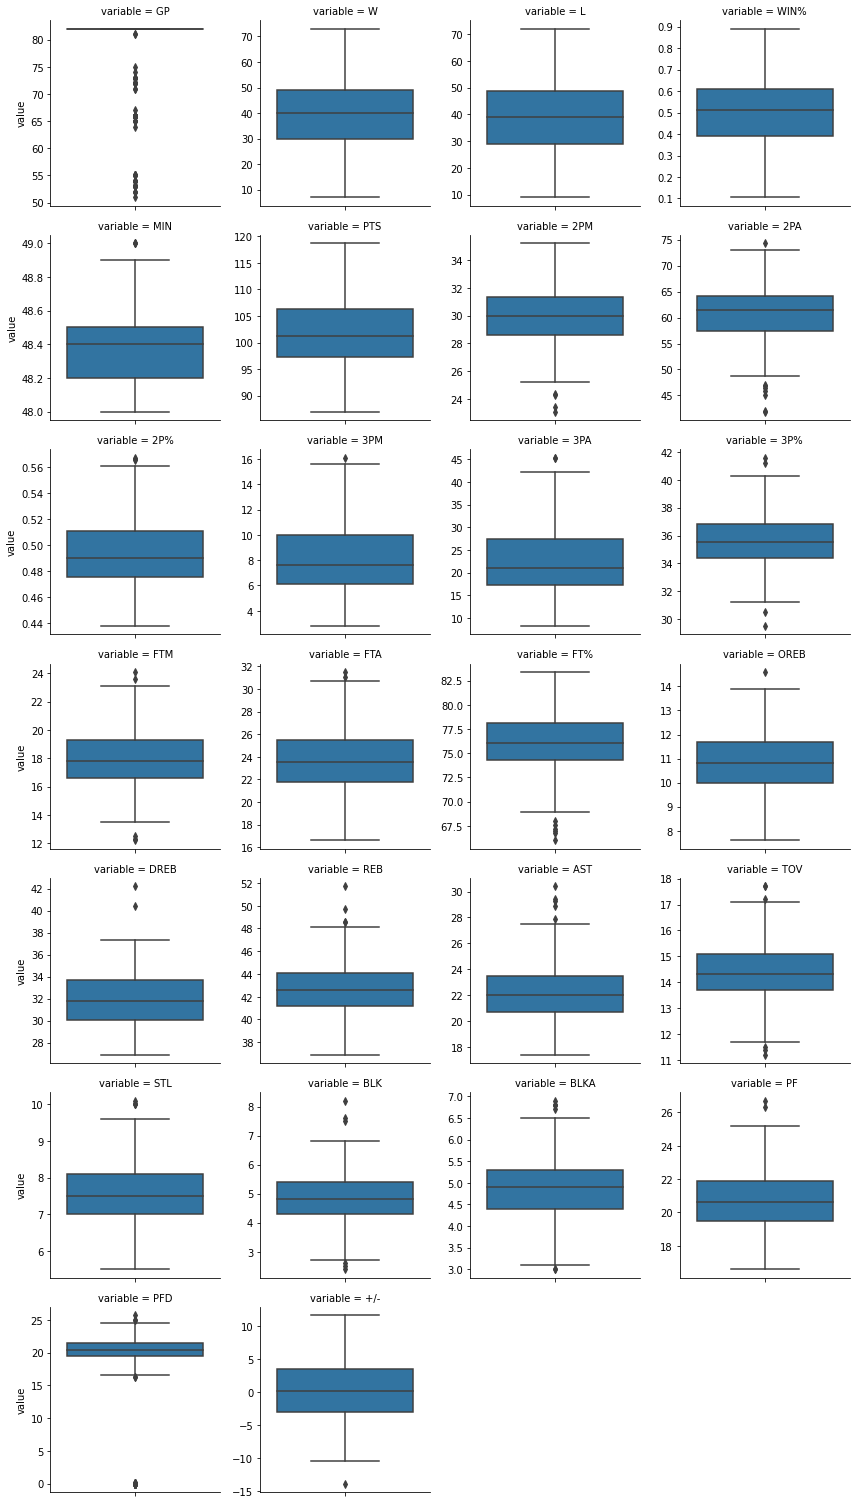

In [11]:
ans = sns.FacetGrid(data = melted_nba_stat, col="variable",  col_wrap=4,sharey=False)
ans.map_dataframe(sns.boxplot, y = 'value')

<AxesSubplot:xlabel='GP', ylabel='count'>

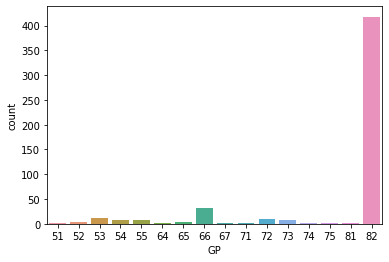

In [12]:
sns.countplot( x = 'GP', data = nba_stat)

אין נתונים חריגים חוץ ממספר משחקים ששוחקו, ההסבר לנתון זה הוא בגלל שיש עונות שמספר המשחקים בהן היה שונה, אך זה לא משפיע על חישובים כי כל החישובים נעשים פר משחק.

<AxesSubplot:xlabel='MIN', ylabel='Count'>

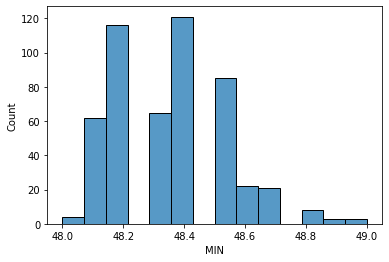

In [13]:
sns.histplot( x = 'MIN', data = nba_stat)

למרות שיש בכל משחק 48 דקות, יש משחקים עם יותר בגלל הארכות וזה גם כן בסדר.

In [14]:
nba_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   teamstatspk  510 non-null    int64  
 1   TEAM         510 non-null    object 
 2   GP           510 non-null    int64  
 3   W            510 non-null    int64  
 4   L            510 non-null    int64  
 5   WIN%         510 non-null    float64
 6   MIN          510 non-null    float64
 7   PTS          510 non-null    float64
 8   2PM          510 non-null    float64
 9   2PA          510 non-null    float64
 10  2P%          510 non-null    float64
 11  3PM          510 non-null    float64
 12  3PA          510 non-null    float64
 13  3P%          510 non-null    float64
 14  FTM          510 non-null    float64
 15  FTA          510 non-null    float64
 16  FT%          510 non-null    float64
 17  OREB         510 non-null    float64
 18  DREB         510 non-null    float64
 19  REB     

## Looking for correlations

In [15]:
nba_stat_cut=nba_stat[['TEAM', 'WIN%', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%','REB', 'AST','BLK', 'BLKA', 'PF', 'PFD', '+/-']]

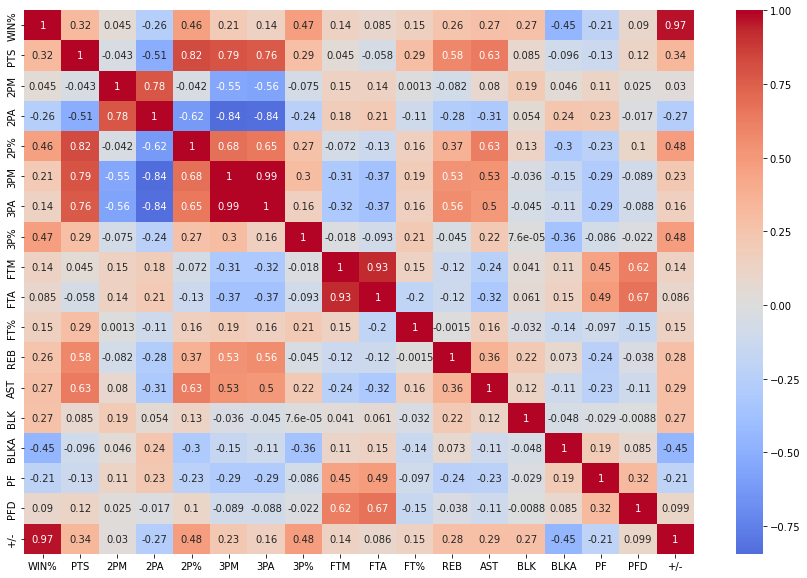

In [16]:
corrs = nba_stat_cut.corr(method = 'spearman')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

היינו מצפים שיהיה מתאם יותר גבוה בין קליעה לנצחון ככל שהקליעה שווה יותר נקודות. אבל להפתעתנו רואים כי דווקא יש מתאם דומה בין אחוזי קליעה לשתיים ונצחונות, לבין אחוזי קליעה לשלוש ונצחונות.
מעניין לבדוק אם יש שינוי בין תקופות בליגה.

### 

### 1 מסקנה
#### ניתן לראות כי עם השנים ישנה עליה במתאם בין אחוזים לשלוש ונצחונות, ובמקביל ירידה במתאם בין אחוזים לשתיים ונצחנות. נתון זה מצביע על שינוי באופי המשחק, עם השנים קבוצות יותר תלויות בזריקות משלוש כדי לנצח.

<AxesSubplot:>

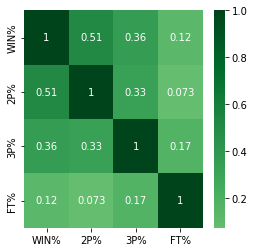

In [17]:
nba_before_2008=nba_stat[nba_stat['SEASON']<'2008-09']
corrs = nba_before_2008[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

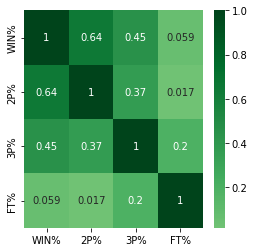

In [18]:
nba_from_2008_to_2012=nba_stat[(nba_stat['SEASON']>='2008-09') & (nba_stat['SEASON']<='2012-13')]
corrs = nba_from_2008_to_2012[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

<AxesSubplot:>

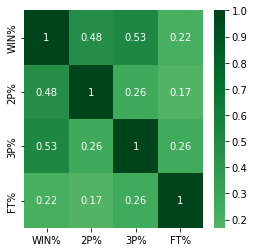

In [19]:
nba_from_2013=nba_stat[nba_stat['SEASON']>='2013-14']
corrs = nba_from_2013[['WIN%','2P%','3P%','FT%']].corr(method = 'spearman')
plt.figure(figsize=(4,4)) 
sns.heatmap(corrs, cmap='Greens', center=0, annot = True)

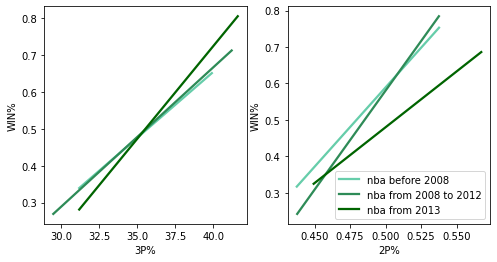

In [20]:
fig, ax= plt.subplots(figsize=(8, 4),ncols=2)
sns.regplot(x='3P%', y='WIN%', data=nba_before_2008, fit_reg=True, ci=None, ax=ax[0], label='nba before 2008',scatter=False, color='mediumaquamarine')
sns.regplot(x='3P%', y='WIN%', data=nba_from_2008_to_2012, fit_reg=True, ci=None, ax=ax[0], label='nba from 2008 to 2012',scatter=False, color='seagreen')
sns.regplot(x='3P%', y='WIN%', data=nba_from_2013, fit_reg=True, ci=None, ax=ax[0], label='nba from 2013',scatter=False,color='darkgreen')
sns.regplot(x='2P%', y='WIN%', data=nba_before_2008, fit_reg=True, ci=None, ax=ax[1], label='nba before 2008',scatter=False, color='mediumaquamarine' )
sns.regplot(x='2P%', y='WIN%', data=nba_from_2008_to_2012, fit_reg=True, ci=None, ax=ax[1], label='nba from 2008 to 2012',scatter=False, color='seagreen')
sns.regplot(x='2P%', y='WIN%', data=nba_from_2013, fit_reg=True, ci=None, ax=ax[1], label='nba from 2013',scatter=False,color='darkgreen')
plt.legend()
plt.show()

בגרף האחוזים לשלוש ניתן לראות כי עם השנים השיפוע (המתאם בין אחוזי ניצחונות לאחוזי קליעה לשלוש) גדל.

מנגד- ניתן לראות כי בגרף האחוזים לשתיים השיפוע הולך וקטן עם השנים. 

### מסקנה 2 
#### כיום בליגת הכדורסל הזו קבוצות לא "מבזבזות זמן" על התעסקות ביריבה, ובעיקר עוסקות באימוני קליעות ומנוחה בין משחקים. כמאמן הייתי מסיק מהנתונים האלה שאולי עדיף לעשות אימון וידאו שמתעסק ביריבה במקום עוד אימון התקפי.

<AxesSubplot:>

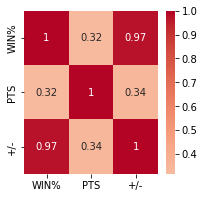

In [21]:
corrs = nba_stat[['WIN%','PTS','+/-']].corr(method = 'spearman')
plt.figure(figsize=(3,3)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)

<AxesSubplot:xlabel='PTS', ylabel='WIN%'>

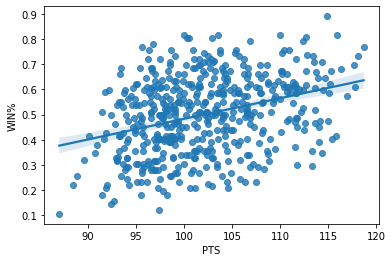

In [22]:

sns.regplot(x='PTS',y='WIN%',data=nba_stat)

ניתן לראות שיש מתאם נמוך בין נצחונות לנקודות, שזה מפתיע. היינו מצפים שככל שקבוצה קולעת יותר נקודות היא תנצח.

<AxesSubplot:xlabel='+/-', ylabel='WIN%'>

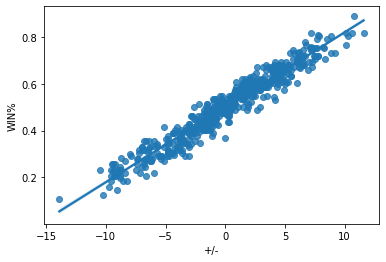

In [23]:
sns.regplot(x='+/-',y='WIN%',data=nba_stat)

בהסתכלות נוספת ניתן לראות שיש מתאם גבוה בין +\- לנצחונות. מה שמסביר כי קבוצה שרוצה לנצח כדאי שתתמקד בלהיות יותר טובה מהיריבה.  

כיום בליגת הכדורסל הזו קבוצות לא "מבזבזות זמן" על התעסקות ביריבה, ובעיקר עוסקות באימוני קליעות ומנוחה בין משחקים. כמאמן הייתי לוקח מהנתונים האלה מסקנה שעדיף לעשות אימון וידאו שמתעסק ביריבה במקום עוד אימון התקפי.

## בר חי

In [24]:
teams = nba_stat.copy()

In [25]:
teams.set_index('TEAM', inplace=True)


In [26]:
teams.rename(index = {"LA Clippers": "Los Angeles Clippers",
                     "Seattle SuperSonics":"Oklahoma City Thunder","New Jersey Nets": "Brooklyn Nets",
                     "Charlotte Bobcats":"Charlotte Hornets","New Orleans Hornets": "New Orleans Pelicans","New Orleans/Oklahoma City Hornets": "New Orleans Pelicans"},
                                 inplace = True)

In [27]:
features1 = ['GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-']
teams = teams.groupby(teams.index)[features1].mean()

In [28]:
teams=teams.sort_values('WIN%',ascending=False).reset_index()
best = teams.head(10)
best

,TEAM,GP,W,L,WIN%,MIN,PTS,2PM,2PA,2P%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,San Antonio Spurs,78.764706,53.000000,25.764706,0.666059,48.300000,103.052941,30.788235,61.017647,0.504475,...,33.064706,42.923529,23.388235,13.311765,7.264706,5.158824,4.482353,18.741176,18.529412,5.364706
1,Houston Rockets,78.764706,46.588235,32.176471,0.584353,48.341176,104.441176,27.205882,53.994118,0.507872,...,32.335294,43.188235,21.835294,14.805882,7.852941,4.664706,5.088235,20.776471,19.752941,2.535294
2,Dallas Mavericks,79.000000,45.882353,33.117647,0.580176,48.376471,102.788235,29.217647,58.394118,0.501643,...,32.341176,42.511765,22.076471,13.182353,7.317647,4.723529,4.123529,20.182353,19.488235,2.247059
3,Miami Heat,78.882353,45.352941,33.529412,0.577706,48.423529,100.917647,29.423529,57.882353,0.509199,...,32.017647,41.800000,21.664706,14.247059,7.488235,5.164706,3.994118,20.417647,19.347059,2.188235
4,Boston Celtics,78.823529,44.941176,33.882353,0.570588,48.376471,101.764706,29.682353,59.464706,0.500026,...,32.094118,42.070588,23.017647,14.682353,7.905882,4.752941,4.829412,21.652941,19.158824,2.652941
5,Denver Nuggets,78.823529,44.352941,34.470588,0.563059,48.329412,106.188235,31.205882,61.752941,0.506529,...,32.388235,43.723529,23.976471,14.752941,8.070588,5.117647,5.482353,21.123529,20.523529,1.705882
6,Golden State Warriors,78.352941,43.941176,34.411765,0.558353,48.294118,107.529412,30.317647,60.082353,0.506673,...,32.547059,43.194118,24.788235,14.688235,8.394118,5.423529,4.482353,21.529412,18.770588,2.094118
7,Oklahoma City Thunder,78.705882,43.352941,35.352941,0.548353,48.382353,104.176471,30.617647,61.741176,0.496816,...,32.552941,44.135294,20.900000,14.870588,7.764706,5.335294,4.717647,21.235294,19.500000,1.358824
8,Utah Jazz,78.764706,42.294118,36.470588,0.538941,48.329412,101.600000,30.282353,60.552941,0.502334,...,31.588235,42.735294,22.741176,14.858824,7.588235,5.123529,5.005882,21.788235,20.382353,1.547059
9,Los Angeles Clippers,78.882353,41.529412,37.352941,0.527765,48.294118,102.635294,30.229412,60.635294,0.499876,...,32.217647,42.641176,22.629412,14.400000,7.535294,5.105882,4.358824,21.152941,20.364706,0.717647


In [29]:
#fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
#plt.subplots_adjust(wspace = 0.3)
#sns.barplot(x="TEAM", y="WIN%",  ci = None, estimator = sum, data=best,ax=axes[0] )
#sns.barplot(x="TEAM", y="PTS",   ci = None, estimator = sum, data=best, ax = axes[1])


In [30]:
features2 = ['WIN%','W', 'L','PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-']
best[features2]

,WIN%,W,L,PTS,2PM,2PA,2P%,3PM,3PA,3P%,...,FT%,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,0.666059,53.000000,25.764706,103.052941,30.788235,61.017647,0.504475,8.211765,21.770588,37.717647,...,76.758824,42.923529,23.388235,13.311765,7.264706,5.158824,4.482353,18.741176,18.529412,5.364706
1,0.584353,46.588235,32.176471,104.441176,27.205882,53.994118,0.507872,10.347059,29.164706,35.558824,...,75.888235,43.188235,21.835294,14.805882,7.852941,4.664706,5.088235,20.776471,19.752941,2.535294
2,0.580176,45.882353,33.117647,102.788235,29.217647,58.394118,0.501643,8.805882,24.694118,35.917647,...,78.605882,42.511765,22.076471,13.182353,7.317647,4.723529,4.123529,20.182353,19.488235,2.247059
3,0.577706,45.352941,33.529412,100.917647,29.423529,57.882353,0.509199,8.147059,22.558824,35.964706,...,74.070588,41.800000,21.664706,14.247059,7.488235,5.164706,3.994118,20.417647,19.347059,2.188235
4,0.570588,44.941176,33.882353,101.764706,29.682353,59.464706,0.500026,8.123529,22.735294,35.847059,...,77.700000,42.070588,23.017647,14.682353,7.905882,4.752941,4.829412,21.652941,19.158824,2.652941
5,0.563059,44.352941,34.470588,106.188235,31.205882,61.752941,0.506529,8.052941,22.817647,35.135294,...,75.429412,43.723529,23.976471,14.752941,8.070588,5.117647,5.482353,21.123529,20.523529,1.705882
6,0.558353,43.941176,34.411765,107.529412,30.317647,60.082353,0.506673,9.800000,26.123529,37.523529,...,76.811765,43.194118,24.788235,14.688235,8.394118,5.423529,4.482353,21.529412,18.770588,2.094118
7,0.548353,43.352941,35.352941,104.176471,30.617647,61.741176,0.496816,7.782353,22.341176,34.982353,...,77.994118,44.135294,20.900000,14.870588,7.764706,5.335294,4.717647,21.235294,19.500000,1.358824
8,0.538941,42.294118,36.470588,101.600000,30.282353,60.552941,0.502334,7.347059,20.582353,35.288235,...,75.352941,42.735294,22.741176,14.858824,7.588235,5.123529,5.005882,21.788235,20.382353,1.547059
9,0.527765,41.529412,37.352941,102.635294,30.229412,60.635294,0.499876,7.735294,21.558824,35.529412,...,74.676471,42.641176,22.629412,14.400000,7.535294,5.105882,4.358824,21.152941,20.364706,0.717647


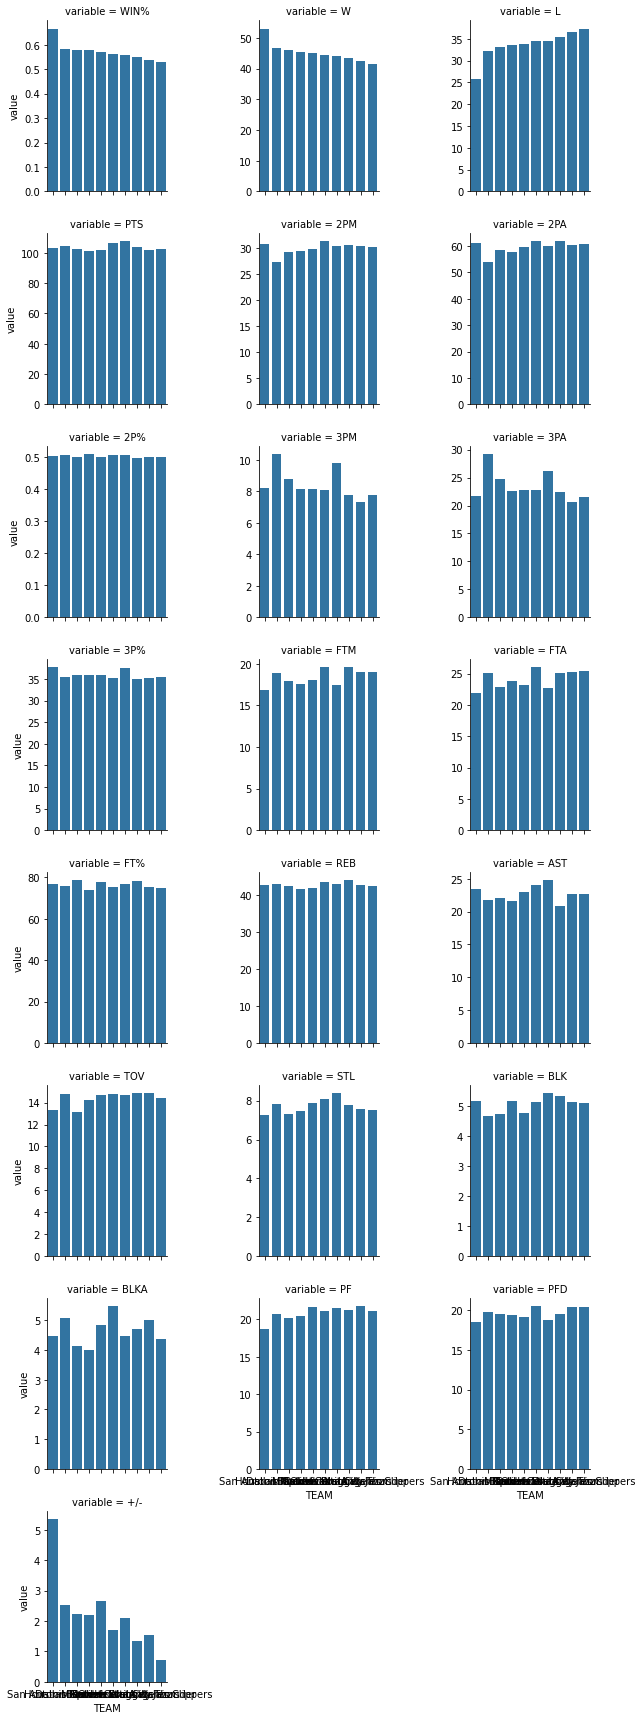

In [31]:
melt_b= pd.melt(best, id_vars = 'TEAM', value_vars = features2 )
#plt.figure(figsize=(15,6))
#plt.xticks(rotation=60)
ans = sns.FacetGrid(data = melt_b, col="variable", col_wrap=3,sharey=False)
ans.map_dataframe(sns.barplot,x="TEAM", y = 'value')
#plt.show()

יש קבוצה שיש לה פער גדול במדדי פלוס מינוס ואחוזי הנצחונות מעל שאר הקבוצות. 
למה הם כל כך גבוהים?


להכניס מספר אליפויות 

In [32]:
df = {'SEASON': ['2020-21','2019-20','2018-19','2017-18','2016-17','2015-16','2014-15','2013-14','2012-13','2011-12','2010-11','2009-10','2008-09','2007-08','2006-07','2005-06','2004-05',], 'TEAM_CHAMP': ['Milwaukee Bucks','Los Angeles Lakers','Toronto Raptors','Golden State Warriors','Golden State Warriors','Cleveland Cavaliers','Golden State Warriors','San Antonio Spurs','Miami Heat','Miami Heat','Dallas Mavericks','Los Angeles Lakers','Los Angeles Lakers','Boston Celtics','San Antonio Spurs','Miami Heat','San Antonio Spurs']}
champ_data = pd.DataFrame(data=df)
champ_data

,SEASON,TEAM_CHAMP
0,2020-21,Milwaukee Bucks
1,2019-20,Los Angeles Lakers
2,2018-19,Toronto Raptors
3,2017-18,Golden State Warriors
4,2016-17,Golden State Warriors
5,2015-16,Cleveland Cavaliers
6,2014-15,Golden State Warriors
7,2013-14,San Antonio Spurs
8,2012-13,Miami Heat
9,2011-12,Miami Heat


In [33]:
#nba_stat.SEASON.to_string()
#print(type(nba_stat['SEASON']))
#champ_data['SEASON']=champ_data['SEASON'].to_string()

In [34]:
#nba_stat['chemp']=[row for row in champ_data.SEASON if (champ_data.SEASON.iloc[row].isin(nba_stat.SEASON.iloc[row:row+30]))&(champ_data['TEAM_CHAMP'].iloc[row].isin(nba_stat.TEAM.iloc[row:row+30]))]

In [35]:
#nba_stat['chemp']=(nba_stat['SEASON'].to_string().split('\n')==champ_data['SEASON'].to_string().split('\n'))&(nba_stat['TEAM'].to_string().split('\n')==champ_data['TEAM_CHAMP'].to_string().split('\n'))
#nba_stat['chemp']

In [36]:
#nba_stat[['SEASON','TEAM','chemp']]

In [37]:
#nba_stat['TEAM'].to_string().split('\n')==champ_data['TEAM_CHAMP'].to_string().split('\n')

In [38]:
#champ_data['TEAM_CHAMP'].to_string().split('\n')

In [39]:
#nba_stat['chemp'].iloc[:30]

ראינו שמספר האליפויות של הקבוצה הזאת לא גבוה כמו שהיינו מצפים.

נחפש בקבוצות האלופות בכל שנה מה היה מיוחד באיזה נתונים הן בלטו?

## שי

<AxesSubplot:xlabel='SEASON', ylabel='PF'>

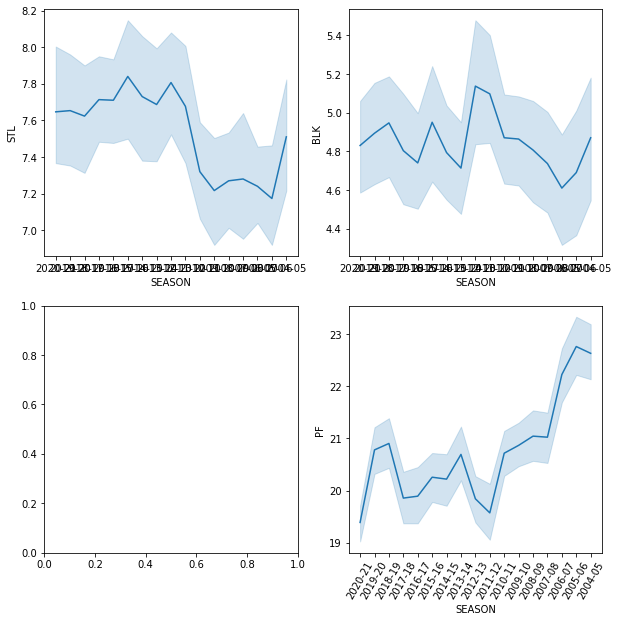

In [40]:
defans=['STL', 'BLK', 'PF']
fig, axes = plt.subplots(2,2,figsize=(10,10))
plt.xticks(rotation=60)
sns.lineplot(data =nba_stat,x='SEASON',y='STL',ax=axes[0,0])
sns.lineplot(data =nba_stat,x='SEASON',y='BLK',ax=axes[0,1])
sns.lineplot(data =nba_stat,x='SEASON',y='PF',ax=axes[1,1])

<AxesSubplot:xlabel='SEASON', ylabel='AST'>

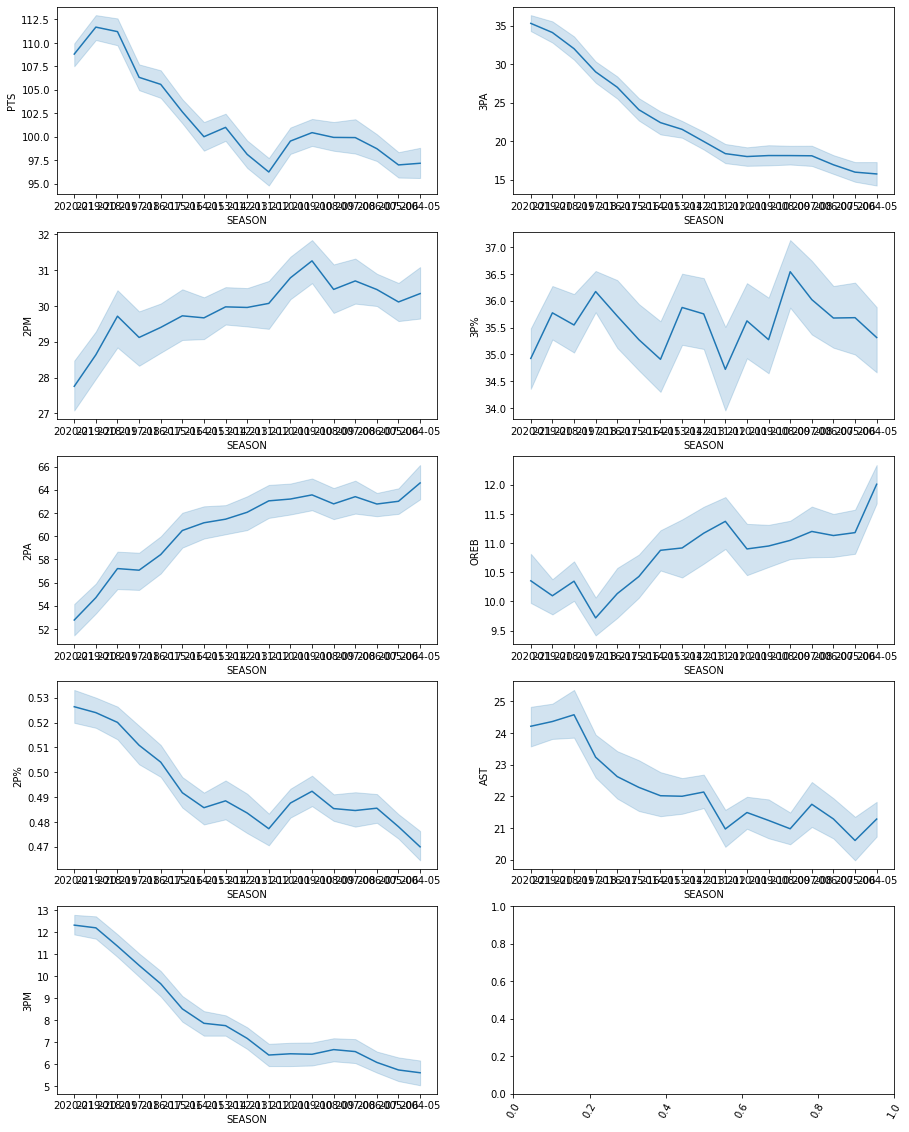

In [41]:
atk=['PTS', '2PM','2PA', '2P%', '3PM', '3PA', '3P%', 'OREB', 'AST']
fig, axes = plt.subplots(5,2,figsize=(15,20))
plt.xticks(rotation=60)
sns.lineplot(data =nba_stat,x='SEASON',y='PTS',ax=axes[0,0])
sns.lineplot(data =nba_stat,x='SEASON',y='2PM',ax=axes[1,0])
sns.lineplot(data =nba_stat,x='SEASON',y='2PA',ax=axes[2,0])
sns.lineplot(data =nba_stat,x='SEASON',y='2P%',ax=axes[3,0])
sns.lineplot(data =nba_stat,x='SEASON',y='3PM',ax=axes[4,0])
sns.lineplot(data =nba_stat,x='SEASON',y='3PA',ax=axes[0,1])
sns.lineplot(data =nba_stat,x='SEASON',y='3P%',ax=axes[1,1])
sns.lineplot(data =nba_stat,x='SEASON',y='OREB',ax=axes[2,1])
sns.lineplot(data =nba_stat,x='SEASON',y='AST',ax=axes[3,1])

## העשר קבוצות הכי טובות

In [42]:
best_teams = nba_stat.copy()
best_teams.set_index('TEAM', inplace=True)
best_teams=best_teams.sort_values('WIN%',ascending=False).reset_index()
best_teams=best_teams.head(10)
best_teams

,TEAM,teamstatspk,GP,W,L,WIN%,MIN,PTS,2PM,2PA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,Golden State Warriors,150,82,73,9,0.890,48.5,114.9,29.4,55.7,...,46.2,28.9,15.2,8.4,6.1,4.1,20.7,19.8,10.8,2015-16
1,Golden State Warriors,180,82,67,15,0.817,48.1,110.0,30.8,60.0,...,44.7,27.4,14.5,9.3,6.0,3.6,19.9,18.8,10.1,2014-15
2,San Antonio Spurs,151,82,67,15,0.817,48.1,103.5,33.1,64.4,...,43.9,24.5,13.1,8.3,5.9,3.9,17.5,19.5,10.6,2015-16
3,Golden State Warriors,120,82,67,15,0.817,48.2,115.9,31.1,55.9,...,44.4,30.4,14.8,9.6,6.8,3.8,19.3,19.4,11.6,2016-17
4,Dallas Mavericks,420,82,67,15,0.817,48.2,100.0,30.2,61.5,...,41.9,19.9,13.9,6.8,5.0,3.8,22.4,22.1,7.2,2006-07
5,Phoenix Suns,0,52,42,10,0.808,48.1,112.7,31.2,57.7,...,46.1,26.5,13.3,8.6,4.3,4.0,19.3,19.3,7.8,2020-21
6,Miami Heat,240,82,66,16,0.805,48.5,102.9,29.7,55.3,...,38.6,23.0,13.9,8.7,5.4,3.2,18.7,20.4,7.9,2012-13
7,Cleveland Cavaliers,360,82,66,16,0.805,48.2,100.3,28.9,58.3,...,42.2,20.3,12.7,7.2,5.3,4.1,20.3,20.3,8.9,2008-09
8,Boston Celtics,390,82,66,16,0.805,48.2,100.5,29.1,57.6,...,42.0,22.4,15.2,8.5,4.6,4.7,22.7,22.2,10.3,2007-08
9,Los Angeles Lakers,361,82,65,17,0.793,48.2,106.9,33.6,66.6,...,43.9,23.3,13.5,8.8,5.1,4.8,20.7,22.1,7.7,2008-09


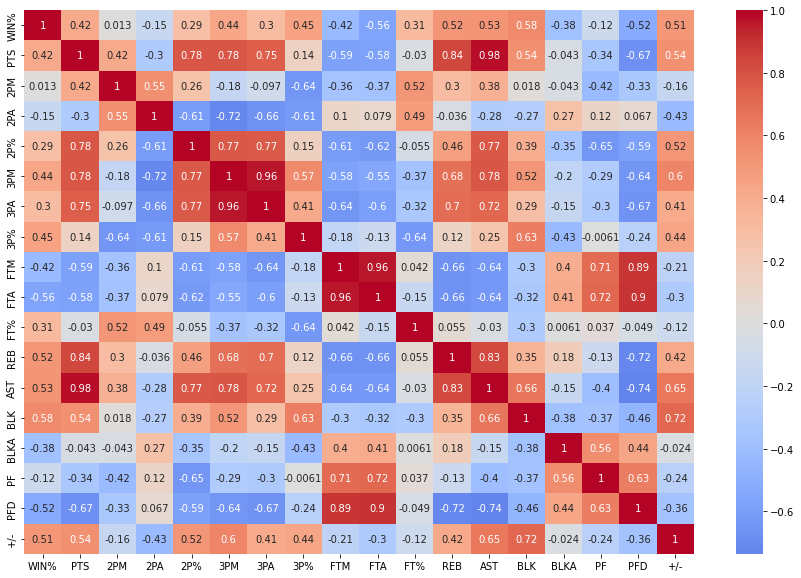

In [43]:
corrs = best_teams[['TEAM', 'WIN%', 'PTS', '2PM',
       '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%','REB', 'AST','BLK', 'BLKA', 'PF', 'PFD', '+/-']].corr(method = 'spearman')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);